In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('../../ijoncour/StandCat/Tgas200_Wright2003_2MASS_FinCat.vot', format='votable')

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [4]:
#Rename columns
Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Bmag = t["BTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["d_arcsec_2"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']

In [5]:
#calculate distance and absolute magnitudes and plot color index vs. absolute g magnitude for different luminosity classes
Dist = 1000./t["Plx"]
Vmags = t['VTmag'] - 5 * np.log10(Dist) + 5
Bmags = t['BTmag'] - 5 * np.log10(Dist) + 5
Gmags = t['__Gmag_'] - 5 * np.log10(Dist) + 5
Jmags = t['Jmag'] -5 * np.log10(Dist) + 5
Hmags = t['Hmag'] - 5 * np.log10(Dist) + 5
Kmags = t['Kmag'] - 5 * np.log10(Dist) + 5

In [6]:
# mask all data that does not have a Qfl value of A

for i in range(0,len(QFlags)):
    if(QFlags[i][0] == ord("A")):
        Jmag.mask[i] = False
    else:
         Jmag.mask[i] = True
            
for i in range(0,len(QFlags)):
    if(QFlags[i][2] == ord("A")):
        Kmag.mask[i] = False
    else:
        Kmag.mask[i] = True  
        
for i in range(0,len(QFlags)):
    if(QFlags[i][1] == ord("A")):
        Hmag.mask[i] = False
    else:
        Hmag.mask[i] = True  

In [7]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  25429  rows in which dup is equal to 1


In [8]:
#look at number of duplicate matches
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Tdups):
            print(Source[i],s1[i],s2[i],Gmag[i],Vmag[i]-Gmag[i],Jmag[i],Kmag[i],TwoM[i])

GAIA Duplicate Source:  6726788842835559552
GAIA Duplicate Source:  5140648418166947328
GAIA Duplicate Source:  2520020864918288896
GAIA Duplicate Source:  5959478126358758016
GAIA Duplicate Source:  6668487925962916480
GAIA Duplicate Source:  1214512606941823360
GAIA Duplicate Source:  4097002323363211776
GAIA Duplicate Source:  5769091159655753856
GAIA Duplicate Source:  6790250970359184768
GAIA Duplicate Source:  5123327399177495808
GAIA Duplicate Source:  6785793275342096256
GAIA Duplicate Source:  2498832038900176000
GAIA Duplicate Source:  5324415053561705216
GAIA Duplicate Source:  2067478096721765376
GAIA Duplicate Source:  4785096491234658304
GAIA Duplicate Source:  5447076227156166528
GAIA Duplicate Source:  6054493694983536384
GAIA Duplicate Source:  5133580860502607104
GAIA Duplicate Source:  452193638896601088
GAIA Duplicate Source:  1837550183626334848
GAIA Duplicate Source:  3248442439236776960
GAIA Duplicate Source:  4392970203357519360
GAIA Duplicate Source:  567531810

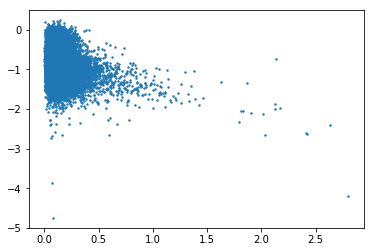

-0.863012770597
0.281449081789


In [9]:
J_G = Jmag-Gmag
plt.scatter(s1,J_G,s=2.0)
plt.show()
JGmean = np.mean(J_G)
JGstd = np.std(J_G)
print(JGmean)
print(JGstd)

 Masked  22  rows based on J-G color > 5 sigma from mean


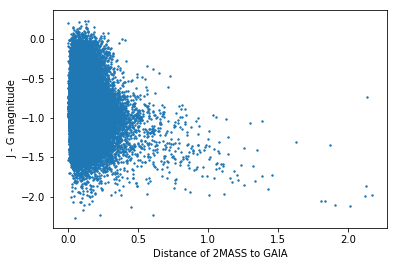

New sigma for J-G:  0.278367044353


In [10]:
#masked rows with J-G greater than 5 sigma from mean
imask = 0
for i in range(0,len(J_G)):
    if(abs(J_G[i] - JGmean) > 5*JGstd):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
J_G = Jmag - Gmag
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(s1,J_G,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(J_G))

In [11]:
print(SpType)

SpType
------
    K0
    F0
    --
    --
    --
    --
  A0 V
    K0
    --
    --
   ...
    --
  G5 V
    --
  K0 V
  F2 V
    AM
    --
  G5 V
  F6 V
  F8 V
    --
Length = 75753 rows


In [12]:
#Translate Spectra Type luminosity class into a number from 1 to 5
#or a negative number if it is a binary or unknown spectral type.
#Note that many stars do not have a luminosity class. There are given 5.1.

SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  49718   Binaries or Unknown luminosity class:  428


In [13]:
#Split class V stars into different temperature ranges and find avg, min, max, and standard deviation of each range
temps = [3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10500]
temp_cat = np.zeros(len(Teff))
tavg = []
tmin = []
tmax = []
t_stdev = []
for t1 in temps: 
    stars = 0
    t2 = t1 + 500
    temp_array = []
    for i in range(len(Teff)):
        if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
            if (Teff[i] >= t1 and Teff[i] < t2):
                temp_cat[i] = t1
                temp_array = np.append(temp_array, Teff[i])
                stars = stars+1
    tavg = np.append(tavg,np.mean(temp_array))
    tmax = np.append(tmax,np.max(temp_array,axis =0))
    tmin = np.append(tmin,np.min(temp_array,axis =0))
    t_stdev = np.append(t_stdev,np.std(temp_array))
    print(str(t1) + 'K : ' + str(stars))
print(tavg)
print(tmax)
print(tmin)
print(t_stdev)

3500K : 8
4000K : 88
4500K : 296
5000K : 452
5500K : 4528
6000K : 8407
6500K : 3061
7000K : 897
7500K : 628
8000K : 194
8500K : 544
9000K : 274
9500K : 346
10500K : 179
[  3816.25         4267.27272727   4780.87837838   5191.28318584
   5788.28180212   6316.05685738   6889.92812806   7201.1148272
   7847.77070064   8194.32989691   8817.13235294   9224.19708029   9520.
  10500.        ]
[  3850.   4420.   4900.   5450.   5860.   6470.   6890.   7450.   7850.
   8200.   8970.   9480.   9520.  10500.]
[  3580.   4000.   4590.   5080.   5570.   6030.   6870.   7150.   7650.
   8100.   8600.   9000.   9520.  10500.]
[  89.29410675  143.63564442  114.12078152   81.80020653   96.32472367
  174.87706937    1.19677616   19.00199992   20.9973831    23.12704564
  127.74001681   41.7007657     0.            0.        ]


In [14]:
#number of main sequence stars
Vstars = 0
for i in range(len(temp_cat)):
    if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        Vstars = Vstars +1
print(Vstars)

#number of stars assigned a temperature category (less than number of main sequence stars)
Tstars = 0
for i in range(len(temp_cat)):
    if (temp_cat[i] != 0):
        Tstars = Tstars +1
print(Tstars)
print(Vstars-Tstars)

19973
19902
71


In [15]:
missing_stars = 0
for i in range(len(temp_cat)):
    if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05 and temp_cat[i] == 0):
        missing_stars = missing_stars +1
print('Missing Stars: '+ str(missing_stars))

Missing Stars: 71


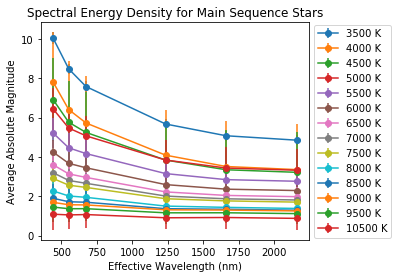

In [28]:
#Absolute Magnitude SED
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('Make_SED_AbsMagSED.pdf')

wvl = [441, 551, 673, 1235, 1662, 2159]
ax = plt.subplot(111)
for t in temps: 
    G_array = ma.array([])
    V_array = ma.array([])
    B_array = ma.array([])
    J_array = ma.array([])
    H_array = ma.array([])
    K_array = ma.array([])
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t):
            V_array = np.append(V_array,Vmags[i])
            B_array = np.append(B_array,Bmags[i])
            G_array = np.append(G_array,Gmags[i])
            J_array = np.append(J_array,Jmags[i])
            H_array = np.append(H_array,Hmags[i])
            K_array = np.append(K_array,Kmags[i])
    mag_array = [np.mean(B_array), np.mean(V_array), np.mean(G_array), \
                 np.mean(J_array), np.mean(H_array), np.mean(K_array)]
    std_array = [np.std(B_array), np.std(V_array), np.std(G_array), \
                 np.std(J_array), np.std(H_array), np.std(K_array)]
    #val = np.sqrt(len(B_array))
    #std_array = std_array/val
    #mag_array2 = [math.log10(np.mean(B_array)), math.log10(np.mean(V_array)), math.log10(np.mean(G_array)), \
    #             math.log10(np.mean(J_array)), math.log10(np.mean(H_array)), math.log10(np.mean(K_array))]
    #std_array2 = [math.log10(np.std(B_array)), math.log10(np.std(V_array)), math.log10(np.std(G_array)), \
    #             math.log10(np.std(J_array)), math.log10(np.std(H_array)), math.log10(np.std(K_array))]
    ax.errorbar(wvl, mag_array, yerr = std_array, linestyle = '-', marker = 'o',label = str(t) + ' K')
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Average Absolute Magnitude')
ax.set_title('Spectral Energy Density for Main Sequence Stars')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pp.savefig()
pp.close()
            
            

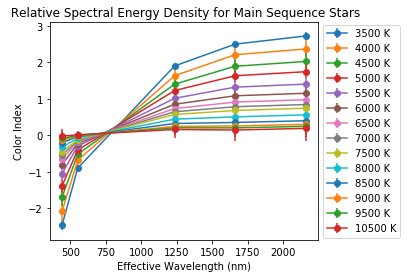

In [30]:
#Relative Magnitude SED
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('Make_SED_RelMagSED.pdf')

wvl2 = [441, 551, 1235, 1662, 2159]
ax = plt.subplot(111)
temp_mags = np.array(wvl2)
temp_std = np.array(wvl2)
for t in temps: 
    G_V_array = ma.array([])
    G_B_array = ma.array([])
    G_J_array = ma.array([])
    G_H_array = ma.array([])
    G_K_array = ma.array([])
    for i in range(len(temp_cat)):
        if (temp_cat[i] == t):
            G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
            G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
            G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
            G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
            G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
    mag_array = [np.mean(G_B_array), np.mean(G_V_array), np.mean(G_J_array), np.mean(G_H_array), np.mean(G_K_array)]
    std_array = [np.std(G_B_array), np.std(G_V_array), np.std(G_J_array), np.std(G_H_array), np.std(G_K_array)]
    #val = np.sqrt(len(G_B_array))
    #std_array = std_array/val
    temp_mags = np.vstack((temp_mags,mag_array))
    temp_std = np.vstack((temp_std,std_array))
    ax.errorbar(wvl2, mag_array, yerr = std_array, linestyle = '-', marker = 'o',label = str(t) + ' K')
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Color Index')
ax.set_title(' Relative Spectral Energy Density for Main Sequence Stars')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pp.savefig()
pp.close()

In [31]:
#test templates
stars_tested = 0
#array of minimum chi^2 for each star 
chi_mins = np.zeros(len(Teff))
#array of temperature template with best fit
best_fit_temp = np.zeros(len(Teff))
[row,col] = temp_mags.shape
for i in range(len(Teff)):
        #only class V stars that have a temperature category assigned
        if (temp_cat[i] != 0 and Gmags.mask[i] != True and Bmags.mask[i] != True and Vmags.mask[i] != True \
            and Jmags.mask[i] != True and Hmags.mask[i] != True and Kmags.mask[i] != True):
            #calculate each color index for each star
            stars_tested = stars_tested+1
            G_B_val = Gmags[i]-Bmags[i]
            G_V_val = Gmags[i]-Vmags[i]
            G_J_val = Gmags[i]-Jmags[i]
            G_H_val = Gmags[i]-Hmags[i]
            G_K_val = Gmags[i]-Kmags[i]
            #array of color indices
            vals = [G_B_val, G_V_val, G_J_val, G_H_val, G_K_val]
            #large value for chi min
            chi_min = 1e100
            #for each temperature template calculate chi^2
            for j in range(1,row): 
                chi_val = 0
                #calculates chi^2 for each color index and adds to chi^2 val
                for k in range(len(vals)):
                    #chi_val = chi_val+ math.pow(((vals[k]-temp_mags[j,k])/0.1),2)
                    chi_val = chi_val+ math.pow(((vals[k]-temp_mags[j,k])/temp_std[j,k]),2)
                #if chi^2 val is smallest add chi^2 value and temperature template category to array
                if (chi_val < chi_min):
                    chi_min = chi_val
                    chi_mins[i] = chi_val
                    best_fit_temp[i] = temps[j-1]
print(chi_mins)
print(best_fit_temp)
print(stars_tested)

[ 0.          0.          0.         ...,  0.55478512  1.85036735  0.        ]
[    0.     0.     0. ...,  6000.  6000.     0.]
19892


In [35]:
#determine how many template fits are good
good_fit_num = 0
bad_fit_num = 0
for i in range(len(Teff)):
    if (SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05 and temp_cat[i] != 0):
        if (best_fit_temp[i] == temp_cat[i]):
            good_fit_num = good_fit_num +1
        else:
            bad_fit_num = bad_fit_num+1
print(good_fit_num)
print(bad_fit_num)
print(good_fit_num+bad_fit_num)
percent = good_fit_num/(good_fit_num+bad_fit_num)*100
print(percent)

11906
7996
19902
59.823133353431814


In [33]:
#find difference between actual temperature and template
temp_diff = np.array([])
for i in range(len(Teff)):
    if (best_fit_temp[i] !=0):
        temp_diff = np.append(temp_diff,Teff[i] - best_fit_temp[i])
print(temp_diff.shape)
print(np.mean(temp_diff))
print(np.std(temp_diff))

(19892,)
264.408807561
452.140525806


(array([  1.30000000e+01,   4.00000000e+00,   1.69000000e+02,
          1.10100000e+03,   1.68070000e+04,   1.63300000e+03,
          1.20000000e+02,   3.00000000e+01,   1.00000000e+01,
          5.00000000e+00]),
 array([-4060., -3104., -2148., -1192.,  -236.,   720.,  1676.,  2632.,
         3588.,  4544.,  5500.]),
 <a list of 10 Patch objects>)

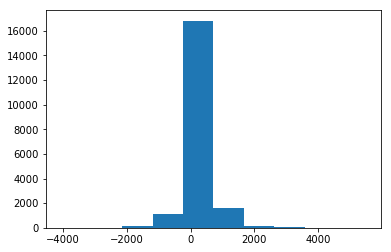

In [34]:
#plot histogram of difference between actual temperature and template 
plt.hist(temp_diff, range = [min(temp_diff),max(temp_diff)])